# Stathub 2.0 - Premier League Prediction

3) GD Model Creation

In [1]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics

data = pd.read_csv("PremDataProcessed.csv")

To test our model, we will need two inputs: GD and Normalized Average Market Value. If the goal is to predict the 2023-24 season, we have the Normalized Average Market Value before the season starts but not the GD. Therefore, we will need to predict a particular team's GD before the seaason starts. Lets create this model by predicting GD given the year.

In this case, we dont care if "Year" and "GD" have a correlation. We just need to see if using year can create accurate predictions for GD.

In [3]:
gd_data = data.drop(columns=["Position", "Points", "Average_Market_Value", "Normalized_Average_Market_Value"])

#2004/05 season to the 2021/22 season
gd_data_2022 = gd_data.head(len(gd_data) - 20)
gd_data_2022

,Unnamed: 0,Year,Team,Goal_Difference
0,0,2004,chelsea fc,57
1,1,2004,manchester united,51
2,2,2004,arsenal fc,32
3,3,2004,liverpool fc,-1
4,4,2004,tottenham hotspur,11
...,...,...,...,...
355,355,2021,brentford fc,-23
356,356,2021,crystal palace,-37
357,357,2021,norwich city,-19
358,358,2021,watford fc,-43


In [4]:
#teams_22 = gd_data_2022[gd_data_2022["Year"] == 2021]["Team"].unique()
teams_22 = ['manchester city', 'liverpool fc', 'chelsea fc',
       'manchester united', 'tottenham hotspur', 'arsenal fc',
       'leicester city', 'aston villa', 'everton fc',
       'wolverhampton wanderers', 'west ham united',
       'brighton & hove albion', 'newcastle united', 'leeds united',
       'southampton fc', 'brentford fc', 'crystal palace', 'norwich city',
       'watford fc', 'burnley fc']

In [5]:
gd_year_predictions = []
for i in range(20):
    team = teams_22[i]
    team_df = gd_data_2022[gd_data_2022['Team'] == team]
    
    degrees = 1
    if not team_df.empty:  # Check if team_df is not empty
        team_std_dev = team_df['Goal_Difference'].std()

        x = team_df['Year']
        y = team_df['Goal_Difference']

        x = x.values.reshape(-1,1)
        y = y.values.reshape(-1,1)

        poly = PolynomialFeatures(degree= degrees, include_bias=False)
        poly_features = poly.fit_transform(x)
        poly_reg_model = LinearRegression()
        poly_reg_model.fit(poly_features, y)

        y_predicted = poly_reg_model.predict(poly_features)

        predictions = poly_reg_model.predict(poly_features)

        poly23 = poly_features = poly.fit_transform([[2023]])
        gd_year_predictions.append(poly_reg_model.predict(poly23))
        gd_year_predictions[i] = gd_year_predictions[i][0][0].round()
        
        print(team)
        print("Standard Deviation:", team_std_dev)
        print("Next GD:", gd_year_predictions[i])
        print("_________________________________")
        
        #UNCOMMENT TO VIEW PLOTS
        #plt.scatter(x, y, color = 'purple')
        #plt.plot(x, y_predicted, color = 'green', linewidth = 3)
        #plt.title("")
        #plt.show()
        
    else:
        gd_year_predictions.append(-20)
        print(f"No data found for {team}. Skipping prediction.")
        print("_________________________________")
        
    

manchester city
Standard Deviation: 27.358728040608906
Next GD: 83.0
_________________________________
liverpool fc
Standard Deviation: 20.208472305970496
Next GD: 50.0
_________________________________
chelsea fc
Standard Deviation: 15.21179452958978
Next GD: 25.0
_________________________________
manchester united
Standard Deviation: 11.45836452758677
Next GD: 26.0
_________________________________
tottenham hotspur
Standard Deviation: 10.015021397619241
Next GD: 25.0
_________________________________
arsenal fc
Standard Deviation: 11.28015204087957
Next GD: 11.0
_________________________________
leicester city
Standard Deviation: 15.004166088123657
Next GD: 24.0
_________________________________
aston villa
Standard Deviation: 10.602335771400744
Next GD: -9.0
_________________________________
everton fc
Standard Deviation: 10.180719956050721
Next GD: 9.0
_________________________________
wolverhampton wanderers
Standard Deviation: 16.451950239004088
Next GD: 10.0
___________________

In [6]:
teams_gd_year_df = pd.DataFrame({'Team': teams_22, 'GD_Year_Predictions': gd_year_predictions})
teams_gd_year_df

,Team,GD_Year_Predictions
0,manchester city,83.0
1,liverpool fc,50.0
2,chelsea fc,25.0
3,manchester united,26.0
4,tottenham hotspur,25.0
5,arsenal fc,11.0
6,leicester city,24.0
7,aston villa,-9.0
8,everton fc,9.0
9,wolverhampton wanderers,10.0


In [7]:
gd_data_2023 = gd_data.tail(20)
gd_data_2023

,Unnamed: 0,Year,Team,Goal_Difference
360,360,2022,manchester city,61
361,361,2022,arsenal fc,45
362,362,2022,chelsea fc,15
363,363,2022,manchester united,35
364,364,2022,liverpool fc,28
365,365,2022,tottenham hotspur,19
366,366,2022,newcastle united,5
367,367,2022,brighton & hove albion,7
368,368,2022,aston villa,12
369,369,2022,wolverhampton wanderers,2


In [8]:
teams_predictions = teams_gd_year_df["Team"].tolist()
diff = 0
num = 0
for team in gd_data_2023["Team"]:
    if(team in teams_predictions):
        gd_pred = int(teams_gd_year_df.loc[teams_gd_year_df["Team"] == team]["GD_Year_Predictions"])
        gd_actual = int(gd_data_2023.loc[gd_data_2023["Team"] == team]["Goal_Difference"])
        diff += abs(gd_actual - gd_pred)
diff /= 17
diff

/var/folders/dt/n6z_ll3x7g99tg2r0zlz6_8r0000gn/T/ipykernel_40972/440877809.py:6: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  gd_pred = int(teams_gd_year_df.loc[teams_gd_year_df["Team"] == team]["GD_Year_Predictions"])
/var/folders/dt/n6z_ll3x7g99tg2r0zlz6_8r0000gn/T/ipykernel_40972/440877809.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  gd_actual = int(gd_data_2023.loc[gd_data_2023["Team"] == team]["Goal_Difference"])


16.058823529411764

Each GD was off by an average of 16 goals. This is not good enough.

Idea:  
Let's examine using Normalized Average Market Value to predict GD

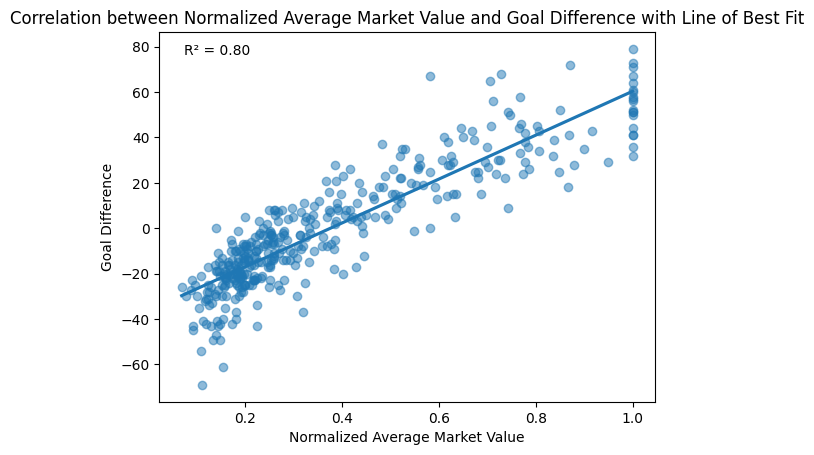

In [9]:
# Scatterplot with a regression line showing the correlation between Average Market Value and Points
sns.regplot(data=data, x="Normalized_Average_Market_Value", y="Goal_Difference", ci=None, scatter_kws={'alpha':0.5})
plt.title("Correlation between Normalized Average Market Value and Goal Difference with Line of Best Fit")
plt.xlabel("Normalized Average Market Value")
plt.ylabel("Goal Difference")

# Calculating and displaying the r-squared value
slope, intercept, r_value, p_value, std_err = linregress(data["Normalized_Average_Market_Value"], data["Goal_Difference"])
plt.text(0.05, 0.95, f'R² = {r_value**2:.2f}', ha='left', va='center', transform=plt.gca().transAxes)

plt.show()

In [10]:
gd_data2 = data.drop(columns=["Position", "Points", "Average_Market_Value", "Year"])

#2004/05 season to the 2021/22 season
gd_data_2022_2 = gd_data2.head(len(gd_data) - 20)
gd_data_2022_2

,Unnamed: 0,Team,Goal_Difference,Normalized_Average_Market_Value
0,0,chelsea fc,57,1.000000
1,1,manchester united,51,0.741815
2,2,arsenal fc,32,0.624883
3,3,liverpool fc,-1,0.547240
4,4,tottenham hotspur,11,0.321796
...,...,...,...,...
355,355,brentford fc,-23,0.279332
356,356,crystal palace,-37,0.318959
357,357,norwich city,-19,0.141026
358,358,watford fc,-43,0.128982


In [11]:
namv_2023_gd_pred = gd_data2.tail(20)
namv_2023_gd_pred

,Unnamed: 0,Team,Goal_Difference,Normalized_Average_Market_Value
360,360,manchester city,61,1.000000
361,361,arsenal fc,45,0.707122
362,362,chelsea fc,15,0.686647
363,363,manchester united,35,0.524332
364,364,liverpool fc,28,0.617804
365,365,tottenham hotspur,19,0.566469
366,366,newcastle united,5,0.422849
367,367,brighton & hove albion,7,0.374184
368,368,aston villa,12,0.351632
369,369,wolverhampton wanderers,2,0.343323


In [12]:
teams = namv_2023_gd_pred["Team"].unique().tolist()

In [13]:
gd_namv_predictions = []

for i in range(20):
    team = teams[i]
    team_df = gd_data_2022_2[gd_data_2022_2['Team'] == team]
    
    if not team_df.empty: 
        degrees = 1

        team_std_dev = team_df['Goal_Difference'].std()

        x = team_df['Normalized_Average_Market_Value']
        y = team_df['Goal_Difference']

        x = x.values.reshape(-1,1)
        y = y.values.reshape(-1,1)

        poly = PolynomialFeatures(degree= degrees, include_bias=False)
        poly_features = poly.fit_transform(x)
        poly_reg_model = LinearRegression()
        poly_reg_model.fit(poly_features, y)

        y_predicted = poly_reg_model.predict(poly_features)

        predictions = poly_reg_model.predict(poly_features)

        namv = [[data2023["Normalized_Average_Market_Value"][i]]]
        poly23 = poly_features = poly.fit_transform(namv)
        gd_namv_predictions.append(poly_reg_model.predict(poly23))
        gd_namv_predictions[i] = gd_namv_predictions[i][0][0].round()
        print(team)
        print("Standard Deviation:", team_std_dev)
        print("y(" + str(data2023["Normalized_Average_Market_Value"][i]) + ") =", gd_namv_predictions[i])
        print("_____________________________")

        #UNCOMMENT TO VIEW PLOTS
        #plt.scatter(x, y, color = 'purple')
        #plt.plot(x, y_predicted, color = 'green', linewidth = 3)
        #plt.title("")
        #plt.show()
    else: 
        print(team)
        print("No data for this team!")
        gd_namv_predictions.append(-20)
        print("_____________________________")


NameError: name 'data2023' is not defined

In [14]:
teams_predictions = teams_gd_namv_df["Team"].tolist()
diff = 0
num = 0
for team in gd_data_2023["Team"]:
    if(team in teams_predictions):
        gd_pred = int(teams_gd_namv_df.loc[teams_gd_namv_df["Team"] == team]["GD_Namv_Predictions"])
        gd_actual = int(gd_data_2023.loc[gd_data_2023["Team"] == team]["Goal_Difference"])
        diff += abs(gd_actual - gd_pred)
diff /= 17
diff

NameError: name 'teams_gd_namv_df' is not defined

In [15]:
gd_predictions = pd.merge(teams_gd_namv_df, teams_gd_year_df)
real_gd = namv_2023_gd_pred.drop(columns = ["Normalized_Average_Market_Value"])
gd_predictions = pd.merge(gd_predictions,real_gd)
gd_predictions

NameError: name 'teams_gd_namv_df' is not defined

In [16]:
teams

['manchester city',
 'arsenal fc',
 'chelsea fc',
 'manchester united',
 'liverpool fc',
 'tottenham hotspur',
 'newcastle united',
 'brighton & hove albion',
 'aston villa',
 'wolverhampton wanderers',
 'leicester city',
 'west ham united',
 'southampton fc',
 'everton fc',
 'nottingham forest',
 'brentford fc',
 'leeds united',
 'crystal palace',
 'fulham fc',
 'afc bournemouth']

In [17]:
gd_comparison_df = pd.DataFrame()

#Adding -40 for Luton Town as they were never in the Premier League since 2004
gd_year_predictions.append(-40)
gd_namv_predictions.append(-40)

#Creating df
gd_comparison_df["Teams"] = teams
gd_comparison_df["gd_year_predictions"] = gd_year_predictions
gd_comparison_df["gd_namv_predictions"] = gd_namv_predictions
gd_comparison_df

ValueError: Length of values (21) does not match length of index (20)